In [2]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
from ibllib.atlas import AllenAtlas
from brainbox.core import TimeSeries
from brainbox.processing import bin_spikes
import neo.core
from quantities import s
import quantities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

%matplotlib notebook 

In [ ]:
pip install -Uqq ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.3/793.3 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython 8.11.0 which is incompatible.


In [ ]:
import ipdb

In [ ]:
!pip install PYqt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 KB 15.5 MB/s eta 0:00:00


In [ ]:
pip install neo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 KB 6.0 MB/s eta 0:00:00


In [ ]:
pip install elephant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.4 MB/s eta 0:00:00


In [ ]:
pip install ONE-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 124.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 10.2 MB/s eta 0:00:00


In [ ]:
pip install ibllib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 KB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.4/230.4 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB

In [3]:
pw = 'international'
one = ONE(base_url='https://openalyx.internationalbrainlab.org', password=pw, silent=True)
Atlas = AllenAtlas()
pid = '73ff4936-8cd3-4a75-a772-f563e67d249d'

In [4]:
sl = SpikeSortingLoader(pid=pid, one=one, atlas=Atlas)
spikes, clusters, channels = sl.load_spike_sorting()
clusters = sl.merge_clusters(spikes, clusters, channels)
trials = one.load_object(one.pid2eid(pid)[0], 'trials', collection='alf')

In [5]:
spikes['clusters']
clusters.keys()

dict_keys(['depths', 'uuids', 'channels', 'cluster_id', 'amp_max', 'amp_min', 'amp_median', 'amp_std_dB', 'contamination', 'contamination_alt', 'drift', 'missed_spikes_est', 'noise_cutoff', 'presence_ratio', 'presence_ratio_std', 'slidingRP_viol', 'spike_count', 'firing_rate', 'label', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um', 'lateral_um'])

(<Figure size 1152x648 with 4 Axes>,
 array([[<AxesSubplot: title={'center': '2020-09-21_1_SWC_043_probe00, da8dfec1-d265-44e8-84ce-6ae9c109b8bd \n17_575_242 spikes, 914 clusters'}>,
         <AxesSubplot: >],
        [<AxesSubplot: xlabel='time (secs)', ylabel='depth (um)'>,
         <AxesSubplot: title={'center': 'alf'}>]], dtype=object))

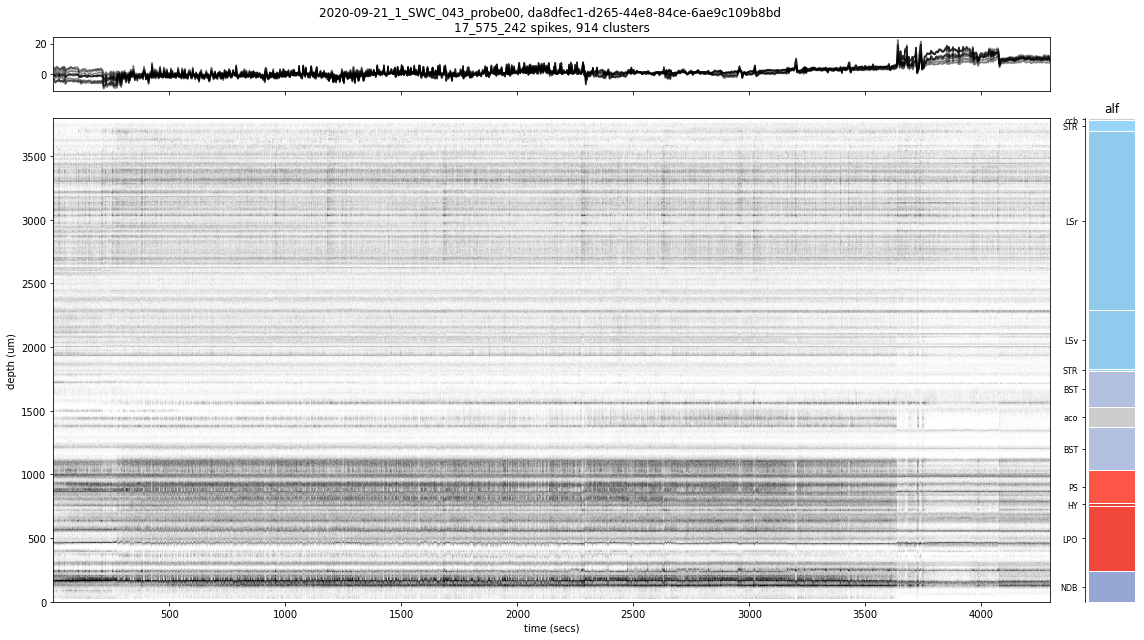

In [ ]:
sl.raster(spikes, channels)

In [5]:
good_clusterIDs = clusters['cluster_id'][clusters['label'] > 0.5] # Find good clusters
good_cluster_loc = np.isin(spikes['clusters'], good_clusterIDs)

In [6]:
good_spikes = {}
for i in spikes:
    good_spikes[i] = spikes[i][good_cluster_loc]

In [ ]:
# trials_spikes = [] # The Spike times and results of each trial

# for i, interval in enumerate(trials['intervals']):
#     time_range = ((good_spikes['times']>interval[0]) & (good_spikes['times']<interval[1])) #Find the spikes corresponding to the current interval
#     spike_range = {}
    
#     for key in good_spikes:
#         spike_range[key] = good_spikes[key][time_range]
        
#     spike_range['goCue_times'] = trials['goCue_times'][i]
#     spike_range['firstMovement_times'] = trials['firstMovement_times'][i]
#     spike_range['choice'] = trials['choice'][i]
#     spike_range['feedbackType'] = trials['feedbackType'][i]
    
#     spiketrains = []

#     for i in range(len(trials['goCueTrigger_times'])): # trial #
#         x = []
#         for j in df: # all spike times, per neuron
#             inds = ((j>trials['firstMovement_times'][i]) & (j<trials['firstMovement_times'][i]+0.5)) # From go queue to first movement
#             sp = neo.core.SpikeTrain(j[inds] * s, trials['firstMovement_times'][i]+0.5)
#             x.append(sp)
        
#         spiketrains.append(x)
#     spike_range['spiketrains'] = spiketrains
    
#     trials_spikes.append(spike_range)

In [7]:
good_spikes

{'amps': array([1.44199673e-04, 8.11267709e-05, 1.61286073e-04, ...,
        1.16995733e-04, 1.28751435e-04, 7.51421495e-05]),
 'depths': array([1285.19836426, 3249.70605469,  598.58154297, ..., 3447.06201172,
        3397.16796875, 3178.75219727]),
 'clusters': array([ 45, 149,  17, ..., 172, 162, 145], dtype=uint32),
 'times': array([1.14723848e-02, 2.03057315e-02, 2.17057336e-02, ...,
        4.66716977e+03, 4.66717600e+03, 4.66717960e+03])}

In [7]:
# good_spikes
df = pd.DataFrame(data = {'clusters':good_spikes['clusters'], 'times':good_spikes['times']})
df = df.groupby('clusters')['times'].apply(np.array)
df

clusters
0      [0.2949394812303215, 0.5639065557162921, 0.984...
1      [0.06473913219077339, 0.20423934370692, 0.4316...
3      [0.15713927229179095, 0.4054729821592443, 0.81...
4      [2.5075761694573937, 2.6577763971973596, 4.406...
6      [3.274543999033264, 7.367216871184397, 8.86758...
                             ...                        
278    [127.95246708560792, 517.703409501185, 1120.04...
281    [3.863144891494941, 83.74316624379325, 90.6256...
282    [2120.8965068528887, 2123.3757440251866, 2336....
283    [21.168104464907533, 21.978539028141622, 212.0...
286    [988.6010230163798, 1379.3503447279209, 1539.8...
Name: times, Length: 181, dtype: object

In [9]:
trials.keys()

dict_keys(['stimOff_times', 'goCueTrigger_times', 'feedbackType', 'contrastLeft', 'contrastRight', 'rewardVolume', 'goCue_times', 'choice', 'feedback_times', 'stimOn_times', 'response_times', 'firstMovement_times', 'probabilityLeft', 'intervals'])

In [9]:
%pdb on

Automatic pdb calling has been turned ON


In [8]:
trial_times = trials['firstMovement_times']
start_times = [i[0] for i in trials['intervals']]
end_times = [i[1] for i in trials['intervals']]

In [9]:
import math

In [10]:
"### Important cell"
spiketrains = []
spc = {'choice' : [], 'feedbackType' : [], 'spiketrain' : []}
last_int = 0

for i in range(len(trials['goCueTrigger_times'])): # trial #
    if (trials['firstMovement_times'][i] < trials['goCue_times'][i]+0.05):
          continue
      
    if ((math.isnan(trial_times[i])) | (math.isnan(trials['goCueTrigger_times'][i]))):
      continue
    x = []
    for row in df: # all spike times, per neuron
        inds = ((row>trial_times[i]-0.1) & (row<trial_times[i]+1)) # From go queue to first movement
        sp = neo.core.SpikeTrain(row[inds] * s, t_start = trial_times[i]-0.1, t_stop = trial_times[i]+1)
        x.append(sp)
    last_int = trial_times[i] + 1
    spc['choice'].append(trials['choice'][i])

    spc['feedbackType'].append(trials['feedbackType'][i])
    spc['spiketrain'].append(x)
    
    spiketrains.append(x)

In [11]:
trains = spc['spiketrain']
choices = spc['choice']
actual = spc['feedbackType']

In [50]:
len(trains)

388

In [12]:

from elephant.gpfa import GPFA



# specify fitting parameters
bin_size = 50 * quantities.ms
latent_dimensionality = 2

gpfa_2dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality, em_max_iters=10, tau_init=200 * quantities.ms)

In [13]:
gpfa_2dim.fit(trains[:250])

c:\Users\asing\anaconda3\envs\production\lib\site-packages\elephant\utils.py:299: UserWarning: Correcting a rounding error in the calculation of the number of bins by incrementing the value by 1. You can set tolerance=None to disable this behaviour.
  warnings.warn('Correcting a rounding error in the calculation '


Initializing parameters using factor analysis...

Fitting GPFA model...


GPFA(bin_size=array(50.) * ms, em_max_iters=10, tau_init=array(200.) * ms,
     x_dim=2)

In [16]:
inds = np.random.choice(len(trains), 50)
t_trains = [trains[i] for i in inds]
t_choices = [choices[i] for i in inds]
t_actual = [actual[i] for i in inds]

In [22]:
len(trains)

388

In [14]:
trajectories_train = gpfa_2dim.transform(trains[:250])
trajectories_test = gpfa_2dim.transform(trains[250:])

c:\Users\asing\anaconda3\envs\production\lib\site-packages\elephant\utils.py:299: UserWarning: Correcting a rounding error in the calculation of the number of bins by incrementing the value by 1. You can set tolerance=None to disable this behaviour.
  warnings.warn('Correcting a rounding error in the calculation '


In [15]:
trajectories_train = np.array([np.array([np.array(j) for j in i]) for i in trajectories_train])
trajectories_test = np.array([np.array([np.array(j) for j in i]) for i in trajectories_test])
trajectories_train.shape

(250, 2, 22)

In [44]:
trajectories[:, 0, :]

array([[ 0.61567773,  0.25718401, -0.13940915, ..., -0.77929629,
        -0.32026293,  0.10743403],
       [-1.69392434, -1.85959134, -1.72578334, ...,  1.51391444,
         1.26993903,  1.04969425],
       [ 0.45326346, -0.05381681, -0.5167656 , ..., -1.37501187,
        -1.84105951, -2.05233503],
       ...,
       [ 0.78627371,  0.10355124, -0.46337434, ...,  1.5739487 ,
         1.82201421,  2.02790824],
       [ 0.44727026,  0.1905363 ,  0.04321191, ...,  2.141946  ,
         2.12247131,  1.99452924],
       [-0.58078008, -1.21949346, -1.77026295, ...,  0.14331788,
         0.26757926,  0.33539433]])

In [16]:
import plotly.express as px
import plotly.graph_objects as go

In [17]:
first = True
first2= True

fig = go.Figure()

y_class_train = []
y_class_test = []

for i in range(len(trajectories_train)):
    if ((choices[i]==1) & (actual[i]==1)):
        if first:
            fig.add_trace(go.Scatter3d(x=np.arange(-100, 1000, 50), y=trajectories_train[i][0, :], z=trajectories_train[i][1, :],
                      mode='lines', line={'color':'blue', 'width':1}, legendgroup='right', name='Wheel Turned Right', showlegend=True))
            first = False
        else:
            fig.add_trace(go.Scatter3d(x=np.arange(-100, 1000, 50), y=trajectories_train[i][0, :], z=trajectories_train[i][1, :],
                        mode='lines', line={'color':'blue', 'width':1}, legendgroup='right', showlegend=False))
        y_class_train.append(0)
        
    elif ((choices[i]==-1) & (actual[i]==1)):
        if first2:
            fig.add_trace(go.Scatter3d(x=np.arange(-100, 1000, 50), y=trajectories_train[i][0, :], z=trajectories_train[i][1, :],
                      mode='lines', line={'color':'red', 'width':1}, legendgroup='left', name='Wheel Turned Left', showlegend=True))
            first2 = False
        else:
            fig.add_trace(go.Scatter3d(x=np.arange(-100, 1000, 50), y=trajectories_train[i][0, :], z=trajectories_train[i][1, :],
                        mode='lines', line={'color':'red', 'width':1}, legendgroup='left', showlegend=False))
        y_class_train.append(1)
    elif ((choices[i]==1) & (actual[i]==-1)):
        y_class_train.append(2)
    elif ((choices[i]==-1) & (actual[i]==-1)):
        y_class_train.append(3)
            
for i in range(len(trajectories_test)):
    if ((choices[i+250]==1) & (actual[i+250]==1)):
        y_class_test.append(0)
    elif ((choices[i+250]==-1) & (actual[i+250]==1)):
        y_class_test.append(1)
    elif ((choices[i+250]==1) & (actual[i+250]==-1)):
        y_class_test.append(2)
    elif ((choices[i+250]==-1) & (actual[i+250]==-1)):
        y_class_test.append(3)
        
    
fig.update_layout(scene = dict(
                    xaxis_title='Time (ms)',
                    yaxis_title='Latent Variable 1',
                    zaxis_title='Latent Variable 2'),
                    width=800, height=800, title='Latent Variables over Time'
                    )
fig.show()

In [19]:
fig.write_html(r"C:\Aryan\4th Year\Winter\DSC 180B\DSC180B-Quarter-2-Project\output\mouse1\latent_trajs2_gpfa.html")

In [76]:
time_sig = 4
X_class_train = trajectories_train[:, :, time_sig]#.reshape(2, 250)
X_class_test = trajectories_test[:, :, time_sig]#.reshape(2, 138)
y_class_train = np.array(y_class_train)
y_class_test = np.array(y_class_test)

In [42]:
from sklearn.linear_model import LogisticRegression

In [68]:
X_class_train.shape

(250, 2)

In [73]:
len(choices)

388

In [77]:
X_class_train[((y_class_train==0) | (y_class_train==1))]

array([[-1.08098587, -0.7324222 ],
       [-1.62012419,  0.23617561],
       [-1.07023368, -1.00855647],
       [-0.78552131, -1.47479322],
       [-0.22872202, -0.30435483],
       [-0.1350953 ,  0.28792561],
       [-0.29875159, -0.13052778],
       [-3.00084119, -1.6203576 ],
       [-0.48483085, -0.13854738],
       [-1.06926169, -1.21668475],
       [-1.85071538, -1.15790201],
       [-0.18704409, -0.09435003],
       [-2.05961573, -1.77559841],
       [-1.41354612, -0.81565659],
       [-0.66141321, -0.01539021],
       [-0.22505783,  0.07171798],
       [-0.4269996 , -0.21216624],
       [-0.85852205, -0.82740418],
       [ 0.20380761,  0.11630408],
       [-0.86116098, -0.37335144],
       [ 0.53575867, -0.29709572],
       [-0.16701779, -0.39585045],
       [ 0.01295739, -0.30733216],
       [-0.64965632, -0.26733584],
       [ 0.7790017 , -0.94160554],
       [-0.51826429, -0.42431276],
       [-0.21439174, -0.57653594],
       [-2.02418135, -1.13384399],
       [-2.81541732,

Training accuracy: 0.8979591836734694
Baseline Accuracy: 0.5309734513274337
Test accuracy: 0.911504424778761


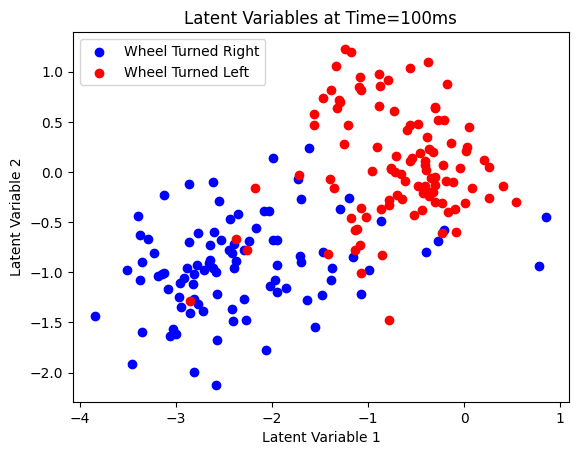

In [89]:
# Predict between Just correct left and correct right
X_class_train01 = X_class_train[((y_class_train==0) | (y_class_train==1))]
y_class_train01 = y_class_train[((y_class_train==0) | (y_class_train==1))]
X_class_test01 = X_class_test[((y_class_test==0) | (y_class_test==1))]
y_class_test01 = y_class_test[((y_class_test==0) | (y_class_test==1))]


mod = LogisticRegression()
mod.fit(X_class_train01, y_class_train01)
print("Training accuracy:", mod.score(X_class_train01, y_class_train01))
print("Baseline Accuracy:" , max(np.mean(y_class_test01==0), np.mean(y_class_test01==1)))
print("Test accuracy:", mod.score(X_class_test01, y_class_test01))


plt.scatter(X_class_train[y_class_train==0][:, 0], X_class_train[y_class_train==0][:, 1], color='blue', label='Wheel Turned Right')
plt.scatter(X_class_train[y_class_train==1][:, 0], X_class_train[y_class_train==1][:, 1], color='red', label='Wheel Turned Left')
plt.xlabel('Latent Variable 1')
plt.ylabel('Latent Variable 2')
plt.title('Latent Variables at Time=100ms')
plt.legend()

Training accuracy: 0.8173913043478261
Baseline Accuracy: 0.9523809523809523
Test accuracy: 0.9523809523809523


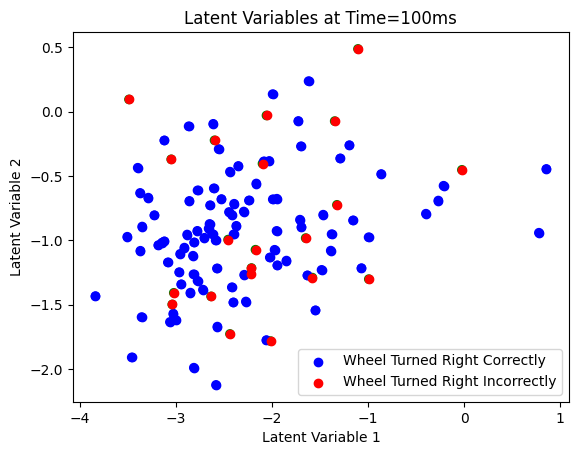

In [88]:
# Predict between Just correct right and incorrect right. Obtains a low accuracy compared to baseline
X_class_train02 = X_class_train[((y_class_train==0) | (y_class_train==2))]
y_class_train02 = y_class_train[((y_class_train==0) | (y_class_train==2))]
X_class_test02 = X_class_test[((y_class_test==0) | (y_class_test==2))]
y_class_test02 = y_class_test[((y_class_test==0) | (y_class_test==2))]


mod = LogisticRegression()
mod.fit(X_class_train02, y_class_train02)
print("Training accuracy:" , mod.score(X_class_train02, y_class_train02))
print("Baseline Accuracy:" , max(np.mean(y_class_test02==0), np.mean(y_class_test02==2)))
print("Test accuracy:" , mod.score(X_class_test02, y_class_test02)) # is 1 because the test set is unbalanced

plt.scatter(X_class_train02[:, 0], X_class_train02[:, 1], color=np.array(['blue', 'red', 'green', 'black'])[y_class_train02])
plt.scatter(X_class_train[y_class_train==0][:, 0], X_class_train[y_class_train==0][:, 1], color='blue', label='Wheel Turned Right Correctly')
plt.scatter(X_class_train[y_class_train==2][:, 0], X_class_train[y_class_train==2][:, 1], color='red', label='Wheel Turned Right Incorrectly')
plt.xlabel('Latent Variable 1')
plt.ylabel('Latent Variable 2')
plt.title('Latent Variables at Time=100ms')
plt.legend()

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\tilde{\\mathbf{x}}_{0}$', ylabel='$\\tilde{\\mathbf{x}}_{1}$'>)

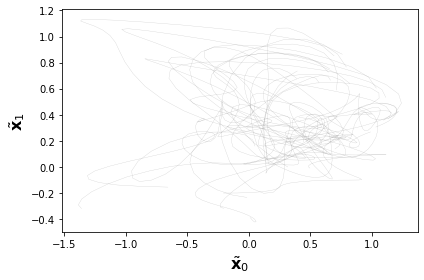

In [ ]:
viziphant.gpfa.plot_trajectories(trajectories, gpfa_2dim)

In [ ]:
average_trajectory = np.mean([i[0] for i in rright], axis=0)

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


ValueError: ignored

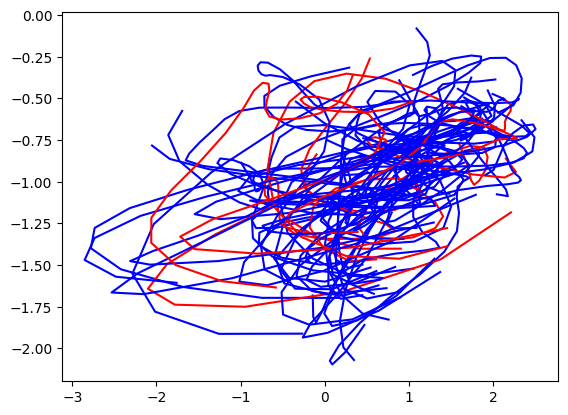

In [17]:
lright = []
lwrong = []
rright = []
rwrong = []
ax = plt.axes()
for i in range(len(trajectories)):
  if t_actual[i] == 1:
    color = "blue"
    rright.append(trajectories[i])
  else:
    color="red"
    rwrong.append(trajectories[i])
  # if t_choices[i] == t_actual[i]:
  #   if t_actual[i] == 1:
  #     #right and correct
  #     color = "teal"
  #     rright.append(trajectories[i])
  #   else:
  #     #left and correct
  #     color = "blue"
  #     lright.append(trajectories[i])
  # elif t_choices[i] != t_actual[i]:
  #   if t_actual[i] == 1:
  #     #right and incorrect"
  #     color = 'pink'
  #     rwrong.append(trajectories[i])
  #   else:
  #     #left and incorrect
  #     color = 'red'
  #     lwrong.append(trajectories[i])
  plt.plot(trajectories[i][0], trajectories[i][1], color=color)
plt.show()

In [ ]:
len(trajectories[0][0])

50

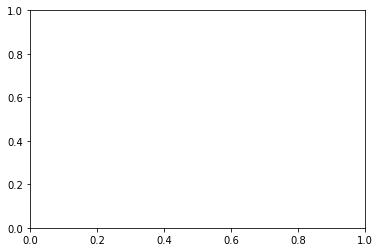

In [ ]:
fig, ax = plt.subplots()
for i in lright:
  plt.plot(i[0], i[1], color='blue')

In [21]:
fig, ax = plt.subplots()
for i in rright:
  plt.plot(i[0], i[1], color='teal')
plt.show()

<IPython.core.display.Javascript object>

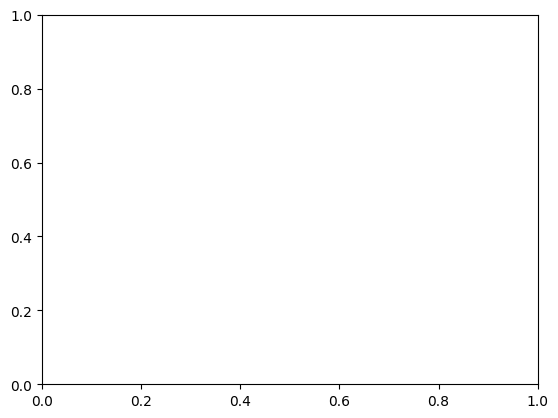

In [20]:
fig, ax = plt.subplots()
for i in lwrong:
  plt.plot(i[0], i[1], color='red')


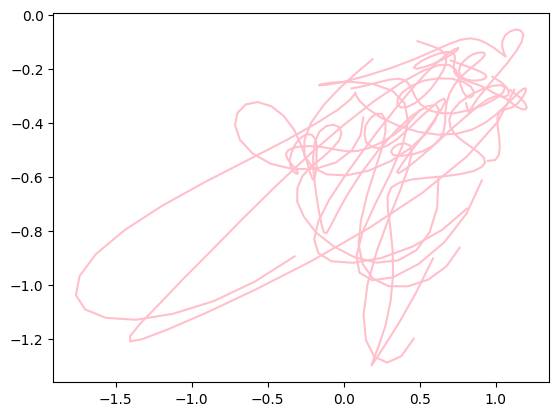

In [30]:
fig, ax = plt.subplots()
for i in rwrong:
  plt.plot(i[0], i[1], color='pink')


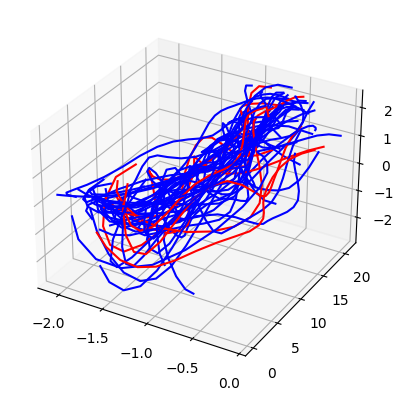

In [19]:
lright = []
lwrong = []
rright = []
rwrong = []
ax = plt.axes(projection='3d')
for i in range(len(trajectories)):
  if t_actual[i] == 1:
    color = "blue"
    rright.append(trajectories[i])
  else:
    color="red"
    rwrong.append(trajectories[i])
  # if t_choices[i] == t_actual[i]:
  #   if t_actual[i] == 1:
  #     #right and correct
  #     color = "teal"
  #     rright.append(trajectories[i])
  #   else:
  #     #left and correct
  #     color = "blue"
  #     lright.append(trajectories[i])
  # elif t_choices[i] != t_actual[i]:
  #   if t_actual[i] == 1:
  #     #right and incorrect
  #     color = 'pink'
  #     rwrong.append(trajectories[i][0])
  #   else:
  #     #left and incorrect
  #     color = 'red'
  #     lwrong.append(trajectories[i][0])
  zline = trajectories[i][0]
  xline = trajectories[i][1]
  yline = range(0, len(trajectories[i][0]))
  ax.plot3D(xline, yline, zline, color)

In [ ]:
def splitDims(arr):
  arr1 = []
  arr2 = []
  for i in arr:
    arr1.append(i[0])
    arr2.append(i[1])
  return (arr1, arr2)
lright = splitDims(lright)

[148, 148]

In [ ]:
def avgNestedLists(nested_vals):
    """
    Averages a 2-D array and returns a 1-D array of all of the columns
    averaged together, regardless of their dimensions.
    """
    output = []
    maximum = 0
    for lst in nested_vals:
        if len(lst) > maximum:
            maximum = len(lst)
    for index in range(maximum): # Go through each index of longest list
        temp = []
        for lst in nested_vals: # Go through each list
            if index < len(lst): # If not an index error
                temp.append(lst[index])
        output.append(np.nanmean(temp))
    return output
avgNestedLists(lright[1])

[0.06040598100966681,
 0.06355301162998543,
 0.06548116401419375,
 0.06639520493791828,
 0.06659508582034178,
 0.06638891365818965,
 0.06602788020595855,
 0.06567871532208933,
 0.06542770076157028,
 0.06530024671237132,
 0.06528269763290412,
 0.0653406551590266,
 0.06543335288598738,
 0.06552465345572098,
 0.06559029413651499,
 0.06562060147892705,
 0.06561874415329699,
 0.06559591496490087,
 0.06556560899289522,
 0.06553898085456228,
 0.06552237862564798,
 0.06551711563990024,
 0.0655208055959663,
 0.06552932383767393,
 0.06553859298705784,
 0.06554573081035138,
 0.06554945401689152,
 0.06554988647418523,
 0.06554803695759731,
 0.06554520967180598,
 0.06554253604097998,
 0.06554071633892573,
 0.06553997081176187,
 0.06554014204691291,
 0.06554086830201337,
 0.06554175508661471,
 0.0655424974526531,
 0.06554293537908155,
 0.06554304941505679,
 0.06554291815054161,
 0.06554266253053775,
 0.06554239723255313,
 0.06554220043503564,
 0.06554210423368077,
 0.06554210135042232,
 0.0655421606

In [ ]:
lright[1]

[[array([ 0.11801501,  0.12401797,  0.12734589,  0.1285986 ,  0.12857621,
          0.12800573,  0.12737371,  0.12690598,  0.12664659,  0.12655668,
          0.12658038,  0.12666923,  0.12678362,  0.12689067,  0.12696638,
          0.12699974,  0.12699383,  0.12696216,  0.12692199,  0.12688784,
          0.12686776,  0.12686289,  0.12686945,  0.12688158,  0.12689385,
          0.12690269,  0.12690679,  0.12690665,  0.12690376,  0.12689991,
          0.12689649,  0.12689432,  0.12689358,  0.12689399,  0.12689504,
          0.12689622,  0.12689715,  0.12689765,  0.12689773,  0.12689751,
          0.12689716,  0.12689681,  0.12689657,  0.12689647,  0.12689648,
          0.12689657,  0.12689668,  0.12689678,  0.12689684,  0.12689686,
          0.12689684,  0.12689681,  0.12689678,  0.12689675,  0.12689674,
          0.12689674,  0.12689674,  0.12689675,  0.12689676,  0.12689677,
          0.12689677,  0.12689677,  0.12689677,  0.12689677,  0.12689676,
          0.12689676,  0.12689676,  0.

ValueError: ignored

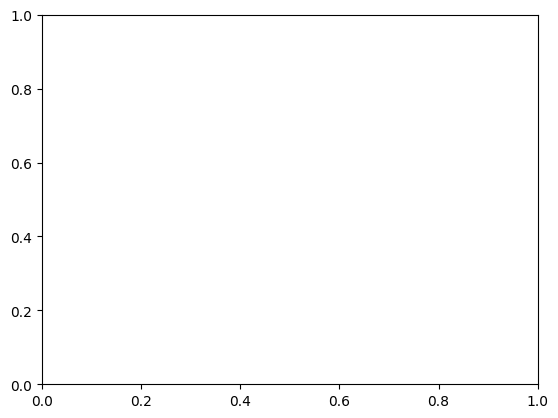

In [ ]:
def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    return arr.mean(axis = -1), arr.std(axis=-1)

y, error = tolerant_mean(lright[0])
x, xerror = tolerant_mean(lright[1])
fig, ax = plt.subplots()
ax.plot(x, y, color='green')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

In [ ]:
import plotly.express as px

In [ ]:
fd = []
td = []
thd = []
color = []
for i in range(len(trajectories)):
  fd.append(trajectories[i][0])
  td.append(trajectories[i][1])
  thd.append(trajectories[i][2])
  color.append('blue')




df = pd.DataFrame()
df[1] = trajectories[i][0]
df[2] = trajectories[i][1]
df[3] = trajectories[i][2]
df['color'] = i
fig = px.line_3d(df, x=1, y=2, z=3, color = 'color')
fig.add_traces
fig.show()

In [ ]:
fig = px.line_3d(df, x=1, y=2, z=3)
fig.show()

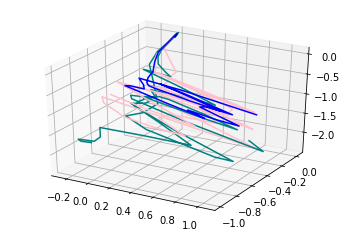

In [ ]:
rc = []
lc = []
ri = []
li = []
ax = plt.axes(projection='3d')

for i in range(len(trajectories)):
  if choices[i] == actual[i]:
    if actual[i] == 1:
      color = "teal"
      rc.append((trajectories[i][0], trajectories[i][1]))
    else:
      color = "blue"
      lc.append((trajectories[i][0], trajectories[i][1]))
  elif choices[i] != actual[i]:
    if actual[i] == 1:
      color = 'pink'
      ri.append((trajectories[i][0], trajectories[i][1]))
    else:
      color = 'red'
      li.append((trajectories[i][0], trajectories[i][1]))
  zline = trajectories[i][0]
  xline = trajectories[i][1]
  yline = trajectories[i][2]
  ax.plot3D(xline, yline, zline, color)
  #plt.plot(trajectories[i][0], trajectories[i][1], color = color)

In [ ]:
[i[0] for i in rc]

[array([-0.00535492, -0.00560249, -0.00572106, ...,  1.48196808,
         1.48662867,  1.52815744]),
 array([-0.00535492, -0.00560249, -0.00572106, ...,  1.78455668,
         2.29007065,  2.12593851]),
 array([-0.00535492, -0.00560249, -0.00572106, ...,  0.88550968,
         0.6325827 ,  0.34565323])]

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

linewidth_single_trial = 0.5
color_single_trial = 'C0'
alpha_single_trial = 0.5

linewidth_trial_average = 2
color_trial_average = 'C1'

ax1.set_title('Original latent dynamics')
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')
ax1.set_aspect(1)
ax1.plot(oscillator_trajectory_2dim[0], oscillator_trajectory_2dim[1])

ax2.set_title('Latent dynamics extracted by GPFA')
ax2.set_xlabel('Dim 1')
ax2.set_ylabel('Dim 2')
ax2.set_aspect(1)
# single trial trajectories
for single_trial_trajectory in trajectories:
    ax2.plot(single_trial_trajectory[0], single_trial_trajectory[1], '-', lw=linewidth_single_trial, c=color_single_trial, alpha=alpha_single_trial)
# trial averaged trajectory
average_trajectory = np.mean(trajectories, axis=0)
ax2.plot(average_trajectory[0], average_trajectory[1], '-', lw=linewidth_trial_average, c=color_trial_average, label='Trial averaged trajectory')
ax2.legend()

plt.tight_layout()
plt.show()